In [103]:
import os
import numpy as np
#import statistics as stats
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model , metrics,discriminant_analysis , preprocessing , neighbors , cross_validation
from sklearn import utils
pd.set_option('display.max_rows', 15)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 15)

%matplotlib inline
plt.style.use('ggplot')

In [3]:
utils.check_random_state(1)

In [4]:
#Reading the dataset
df = pd.read_csv("Auto.csv")

In [5]:
#Checking the Data types
df.dtypes.value_counts()

int64      4
float64    3
object     2
dtype: int64

In [6]:
#Checking which of the features are object
df.dtypes[df.dtypes == 'object']

horsepower    object
name          object
dtype: object

In [7]:
#Converting to numeric and forcing errors to be NANs
df.horsepower = pd.to_numeric(df.horsepower , 'coerce')
df.horsepower.isnull().sum()

5

In [8]:
df.dropna(inplace = True)

In [9]:
len(df)

392

In [10]:
train_df = df.sample(frac = .5).sort_index()

In [11]:
len(train_df)

196

In [12]:
train_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
11,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340
14,24.0,4,113.0,95.0,2372,15.0,70,3,toyota corona mark ii


In [13]:
model_linear = smf.ols(formula = 'mpg ~ horsepower' , data = train_df).fit()

In [14]:
train_df.index 

Int64Index([  3,   4,   5,  11,  14,  15,  16,  17,  20,  21,
            ...
            381, 386, 387, 388, 389, 390, 391, 392, 393, 394],
           dtype='int64', length=196)

In [15]:
train_df.index[1]

4

In [16]:
j = 0
for i in range(0 , len(train_df)):
    if i ==train_df.index[i]:
        print  i
        continue 
    else:
        
        
        df_val = pd.DataFrame.append(df_val , df.ix[[i]] , ignore_index=False , verify_integrity=False) 
        #pd.concat(df_val , temp)

NameError: name 'df_val' is not defined

In [ ]:
len(df_val)

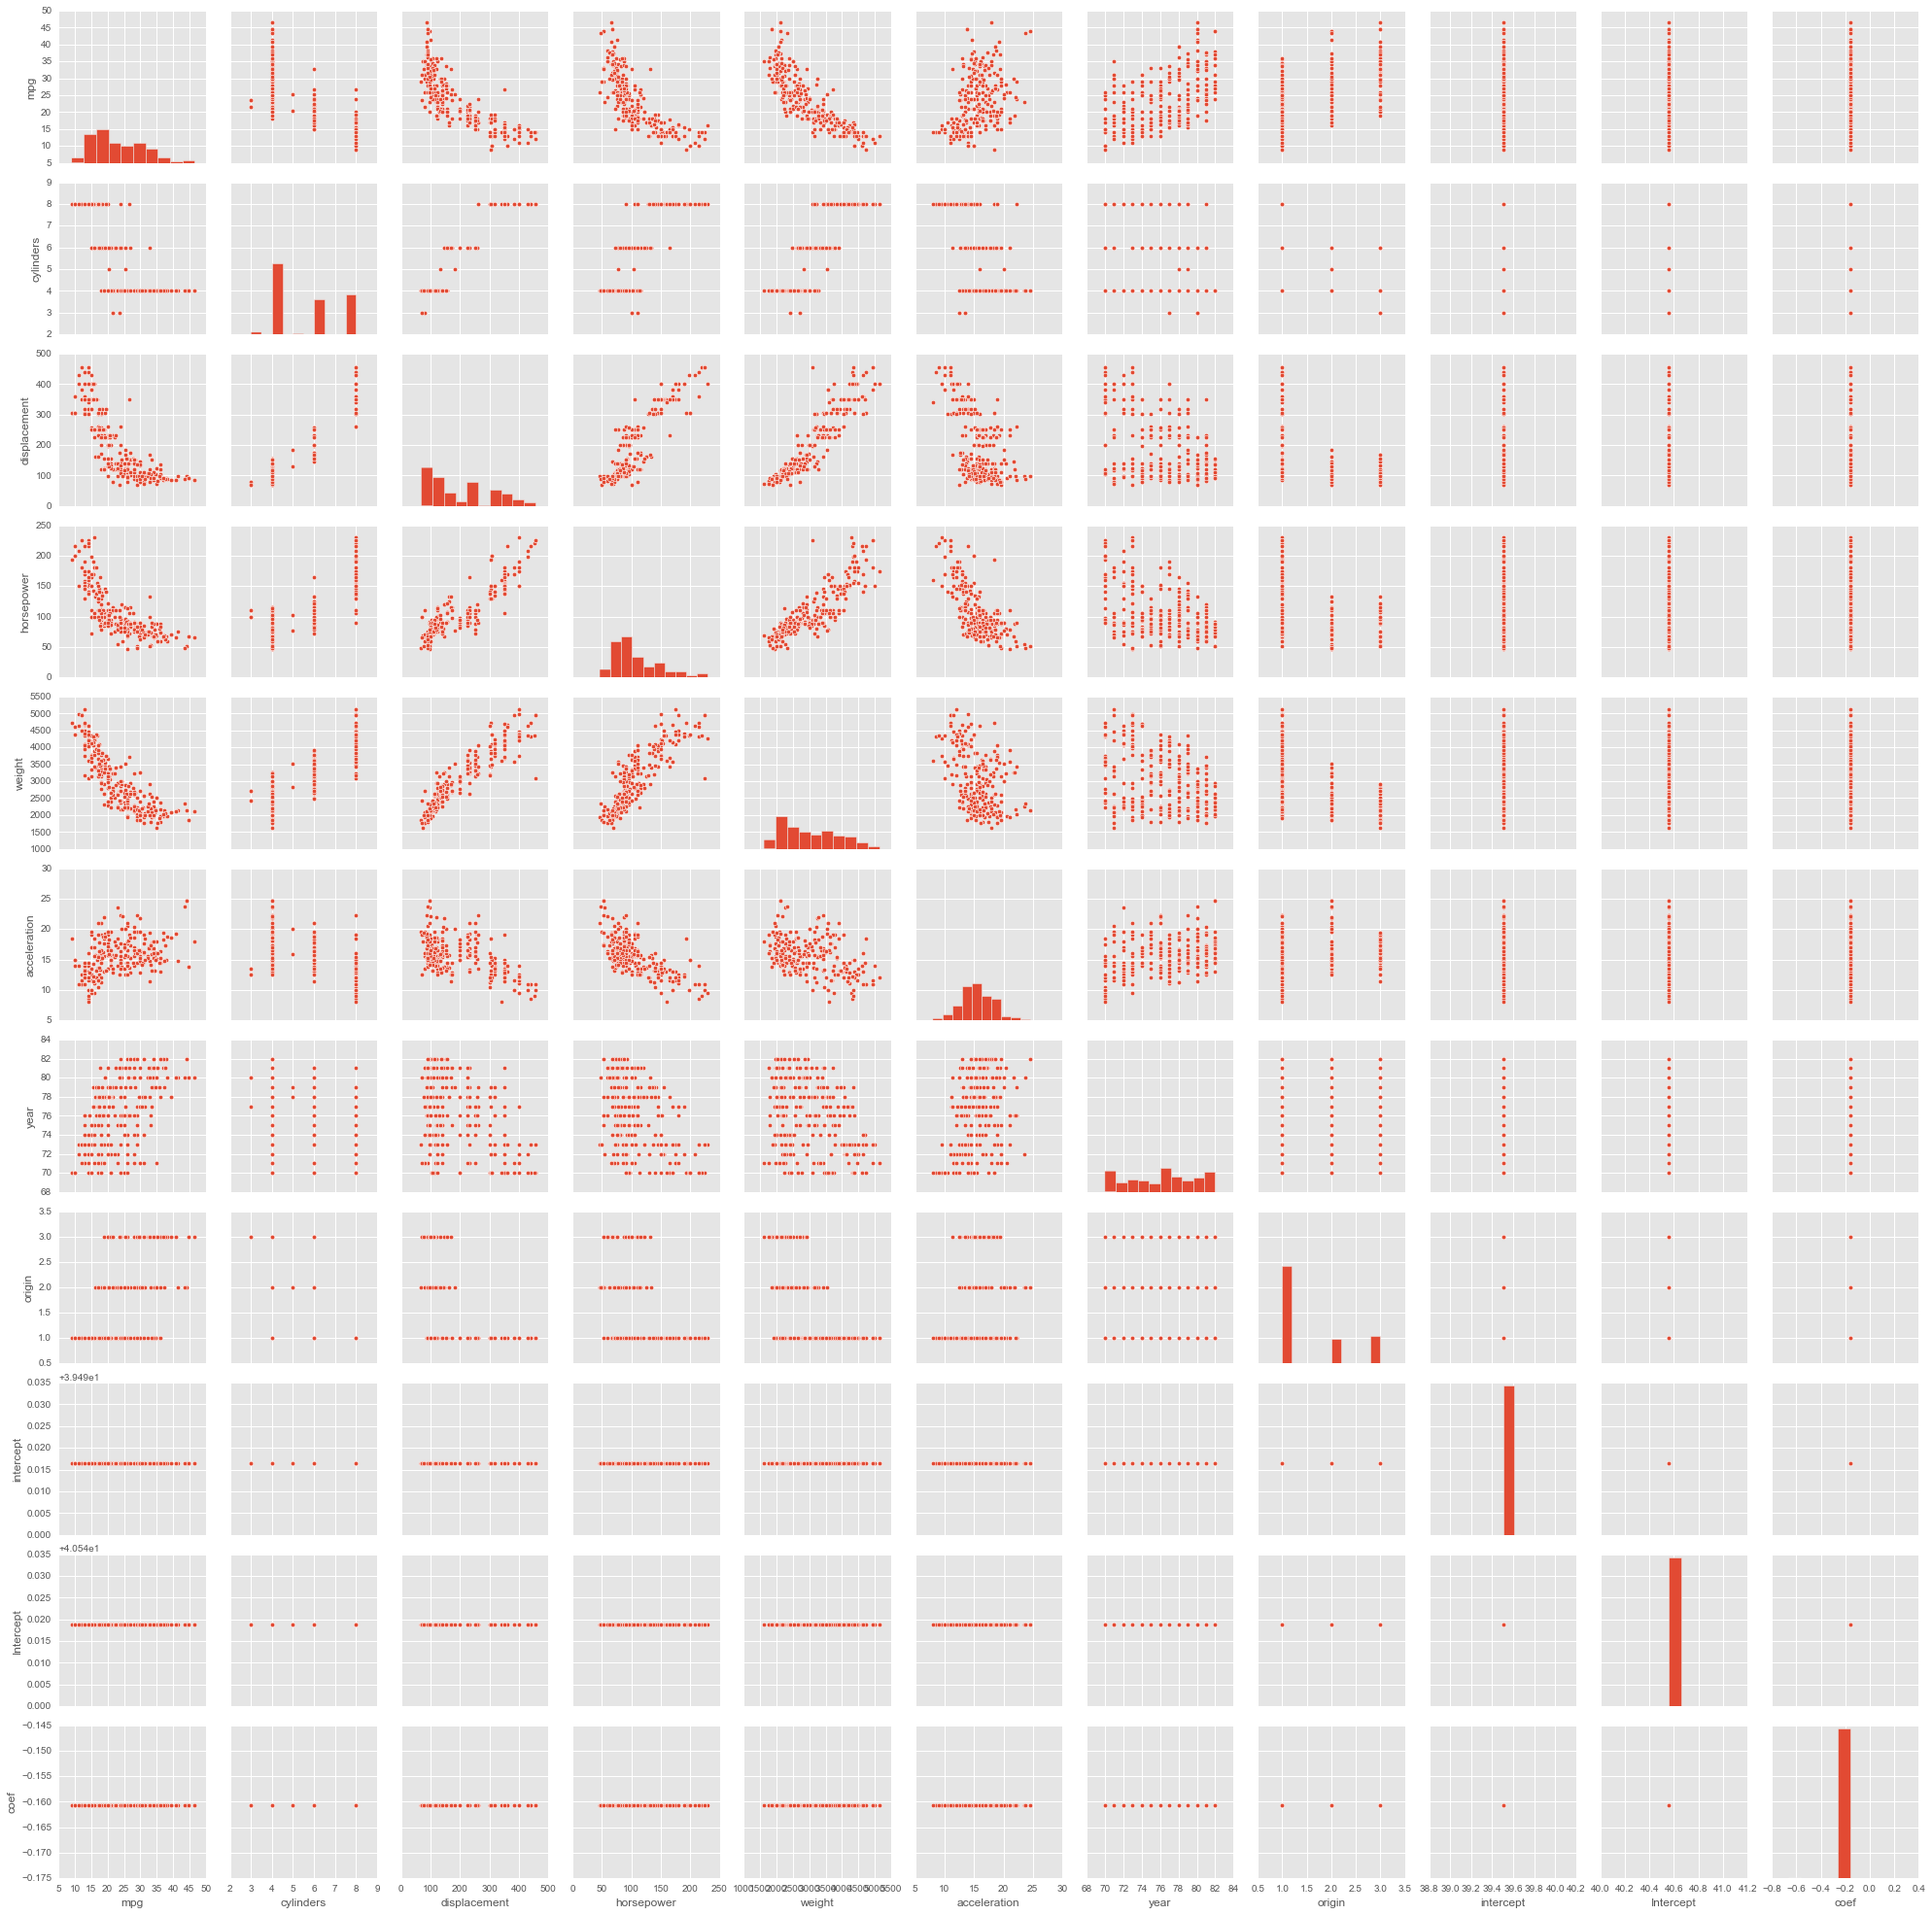

In [394]:
sns.pairplot(data = train_df)

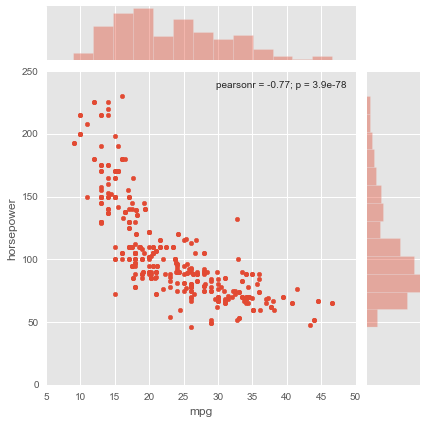

In [393]:
sns.jointplot(x = 'mpg' , y = 'horsepower' , data = train_df) 

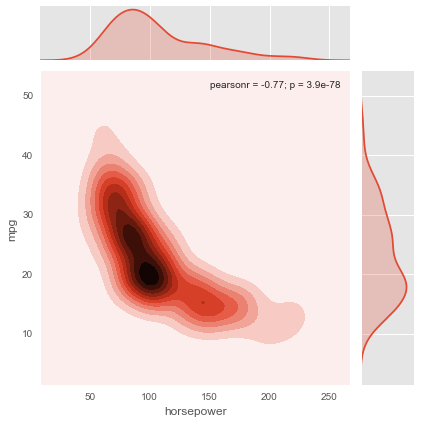

In [397]:
sns.jointplot(x="horsepower", y="mpg", data=train_df, kind="kde");

# Bootstrap

In [98]:
# Computing the statistics of Intrest
#Difference in the mean of 2 returns
def alpha_fn(x , y):
    
    X = x
    print "Length of X is %r" %len(X)
    Y = y
    print "Length of Y is %r" %len(Y)
    
    print "mean of X is %r" %X.mean()
    print "mean of Y is %r" %Y.mean()
    
    mean_x = X.mean()
    mean_y = Y.mean()
    print "return value %r" %(mean_x - mean_y)
    return (mean_x - mean_y)
    

In [99]:
df_prtf = pd.read_csv("Portfolio.csv")

In [100]:
alpha = alpha_fn(df_prtf.X ,df_prtf.Y )
print alpha

Length of X is 97
Length of Y is 97
mean of X is 119.54567010309279
mean of Y is 111.34443298969074
return value 8.201237113402044
8.2012371134


In [117]:
for i in range(0 , len(df_prtf)):
    train_df = df_prtf.sample(frac = 1, replace = True).sort_index()
    train_df['alpha_hat'] = alpha_fn(train_df.X , train_df.Y)

Length of X is 97
Length of Y is 97
mean of X is 118.58422680412367
mean of Y is 110.94989690721653
return value 7.634329896907147
Length of X is 97
Length of Y is 97
mean of X is 118.33195876288652
mean of Y is 109.70835051546383
return value 8.62360824742268
Length of X is 97
Length of Y is 97
mean of X is 117.98690721649479
mean of Y is 109.1968041237113
return value 8.790103092783482
Length of X is 97
Length of Y is 97
mean of X is 121.52597938144326
mean of Y is 113.04938144329896
return value 8.476597938144309
Length of X is 97
Length of Y is 97
mean of X is 121.49432989690722
mean of Y is 113.15103092783501
return value 8.343298969072208
Length of X is 97
Length of Y is 97
mean of X is 120.52773195876287
mean of Y is 112.0611340206186
return value 8.466597938144275
Length of X is 97
Length of Y is 97
mean of X is 120.27546391752574
mean of Y is 112.70752577319587
return value 7.567938144329872
Length of X is 97
Length of Y is 97
mean of X is 120.25154639175256
mean of Y is 111.2

In [118]:
train_df.alpha_hat.describe()

count    9.700000e+01
mean     7.224433e+00
std      1.071351e-14
min      7.224433e+00
25%      7.224433e+00
50%      7.224433e+00
75%      7.224433e+00
max      7.224433e+00
Name: alpha_hat, dtype: float64

## BOOTSTRAPPING ON AUTO DATA SET

In [119]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
...,...,...,...,...,...,...,...,...,...
390,36.0,4,135.0,84.0,2370,13.0,82,1,dodge charger 2.2
391,27.0,4,151.0,90.0,2950,17.3,82,1,chevrolet camaro


In [203]:
# The function below takes a DataFrame as a parameter and populates a DataFrame
def boot_model(train_df):
    formula = 'train_df.mpg ~ train_df.horsepower'
    len(train_df)
    #i = iteration
    model = smf.ols(formula , data = train_df).fit()
    df['Intercept'] = model.params[0]
    df['coef'] = model.params[1]
    
    


In [204]:
# Perform Bootstrapping 100 times:
for i in range(1,101):
    # sampel function to randomly select the data
    train_df = df.sample(frac = 1 , replace = True)
    boot_model(train_df )
    # coeff_hats.head()

# The code below loops throu the entire Data Frame and extracts the model parameters
# for i in range(0,len(df)):
#     df['intercept'] = df.coeff_hats[i].params.Intercept
#     df['coef']      = df.coeff_hats[i].params.train_df.horsepower

In [206]:
df.coef.describe()

count    3.920000e+02
mean    -1.561977e-01
std      1.500716e-15
min     -1.561977e-01
25%     -1.561977e-01
50%     -1.561977e-01
75%     -1.561977e-01
max     -1.561977e-01
Name: coef, dtype: float64

In [207]:
df.intercept.describe()

count    3.920000e+02
mean     3.950639e+01
std      1.494047e-13
min      3.950639e+01
25%      3.950639e+01
50%      3.950639e+01
75%      3.950639e+01
max      3.950639e+01
Name: intercept, dtype: float64

## Weekly Data set

In [209]:
df_weekly = pd.read_csv("Weekly.csv")

In [210]:
df_weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [225]:
df_weekly['response'] = 0

In [229]:
#setting response to 1 when the direction is up, or you might have used a dummy var
df_weekly.loc[(df_weekly.Direction == 'Up') , 'response'] = 1

In [230]:
model_weekly = linear_model.LogisticRegression()

In [273]:
# defining a new feature called posterior that will hold the probability values
df_weekly['posterior'] = 0
# defining X and Y for model parameters
X = df_weekly

X = X.drop(['Direction' , 'response' , 'respose' , 'Lag3' , 'Lag4' , 'Lag5' , 'Volume' , 'Today' , 'posterior'] , axis =1 )
X = X.drop(['y_hat' , 'Accuracy' , 'Year'] , axis =1)
y = df_weekly.response

In [250]:
y[4]

1

In [274]:
X.columns

Index([u'Lag1', u'Lag2'], dtype='object')

In [309]:
model_temp = linear_model.LogisticRegression()
model_temp.fit(X , y)
a = model_temp.coef_



In [310]:
b_0 = model_temp.intercept_
b_1 = a[0,0]
b_2 = a[0,1]

In [318]:
t = np.exp(b_0 + b_1*X.Lag1[[1]] + b_2*X.Lag2[[1]])
print (t/(1+t))

1    0.56954
dtype: float64


In [319]:
df_weekly.ix[2 , 'posterior']

0

In [261]:
temp

1       0
2       1
3       1
4       1
5       0
6       1
7       1
       ..
1082    1
1083    0
1084    1
1085    1
1086    1
1087    1
1088    1
Name: response, dtype: int64

In [268]:
# y_hat is a new column that will hold the predicted value of the model 
df_weekly['y_hat'] = np.NAN
df_weekly['Accuracy'] = np.NAN


In [323]:
for i in range(0 , len(X)):
    #selecting ith row of the iteraton as the Test set
    test_X = X.ix[[i]] 
    test_y = y[i]
    #train_x should be all the observation expect the test X
    train_X = X.drop(X.index[i])
    train_y = y.drop(y.index[i])
    model = linear_model.LogisticRegression()
    model.fit(train_X , train_y)
    # calculating probabilities
    coeff = model_temp.coef_
    intercept = model_temp.intercept_
    beta_0 = coeff[0,0]
    beta_1 = coeff[0,1]
    f_x = np.exp(b_0 + b_1*X.Lag1[i] + b_2*X.Lag2[i])
    # updating the posterior columns
    df_weekly.ix[i ,'posterior'] = (f_x)/(1 + f_x)
 
    
    # making a prediction
    df_weekly.ix[i , 'y_hat'] = model.predict(test_X)
    df_weekly.ix[i , 'Accuracy'] = (y[i]==df_weekly.y_hat[i])
    
    
    

In [324]:
df_weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,respose,response,posterior,y_hat,Accuracy
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0,0,0.570407,1.0,False
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0,0,0.569540,1.0,False
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,0,1,0.575358,1.0,True
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,0,1,0.482348,0.0,False
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,0,1,0.599766,1.0,True


In [325]:
df_weekly.Accuracy = 1*df_weekly.Accuracy

In [327]:
df_weekly.Accuracy.describe()

count     1089
unique       2
top          1
freq       599
Name: Accuracy, dtype: int64

In [330]:
df_weekly.posterior.describe()

count    1089.000000
mean        0.555353
std         0.042409
min         0.258624
25%         0.531473
50%         0.557166
75%         0.580759
max         0.737246
Name: posterior, dtype: float64

## Question 8

In [346]:
Y = np.random.normal(loc=0.0, scale=1.0, size=100)
print Y
X = np.random.normal(loc=0.0, scale=1.0, size=100)
X_sq = X**2

Y = X -2*X_sq + np.random.normal(loc=0.0, scale=1.0, size=100)
df_sim = pd.DataFrame({'X': X , 'X_sq' : X_sq , 'Y':Y} )


[  1.01786332e+00  -2.02999504e-01  -2.91745012e-01  -1.03364731e+00
  -1.13101682e+00   6.10418865e-01   9.63059145e-01   1.21261149e-01
  -1.54244884e+00   8.49160113e-04   8.09939151e-01  -1.09881430e+00
  -5.11801713e-01  -7.37165841e-01  -1.05332753e+00  -8.85431739e-01
   6.15953810e-01   5.86242903e-02   9.45283518e-01  -1.18342928e-02
  -6.97053715e-01  -1.04930361e+00   1.09566552e+00   2.00207263e-01
  -4.64354943e-01   8.15845058e-01   7.18539618e-01   3.38215941e-01
  -3.16296827e-01   1.66892349e+00   1.67789566e-01  -1.98771002e-01
   7.46447278e-01   2.39457333e-01  -4.58815912e-02   2.14625695e-01
  -6.48051862e-01  -5.88993191e-01  -7.79398635e-01   1.21064048e+00
   1.33938487e+00  -1.45674148e+00  -7.54654254e-01  -2.83421392e-01
  -7.36750560e-01   1.61988389e+00   1.63517294e+00  -2.71641503e-02
  -1.99971302e-01   1.33234174e+00   6.35054385e-01  -3.49572400e-01
  -4.75531568e-02   1.49134665e+00  -1.45277612e+00  -3.56206296e-01
   2.61892691e+00   7.72810547e-01

In [347]:
df_sim.head()

,X,X_sq,Y
0,1.348813,1.819296,-2.388404
1,-1.729708,2.991889,-6.699097
2,-1.222629,1.494821,-3.600165
3,-1.507029,2.271135,-6.733156
4,1.192503,1.422063,-3.241154


In [348]:
df_sim.corr()

,X,X_sq,Y
X,1.000000,-0.080117,0.398637
X_sq,-0.080117,1.000000,-0.862569
Y,0.398637,-0.862569,1.000000


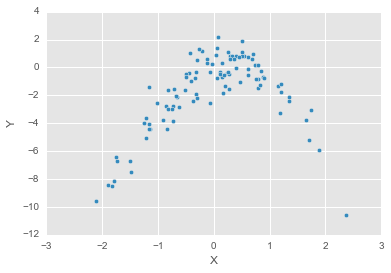

In [349]:
df_sim.plot(kind = 'scatter' , x = 'X' , y = 'Y')

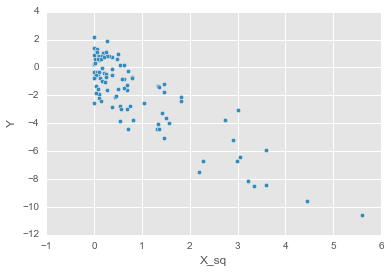

In [350]:
df_sim.plot(kind = 'scatter' , x = 'X_sq' , y = 'Y')

In [352]:
df_sim['X_3'] = df_sim.X**3

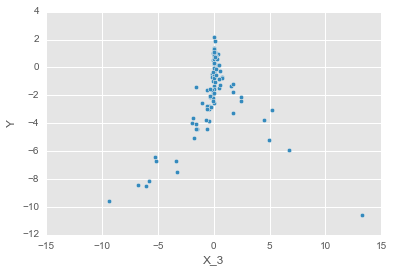

In [353]:
df_sim.plot(kind = 'scatter' , x = 'X_3' , y = 'Y')

In [354]:
df_sim['X_4'] = df_sim.X**4

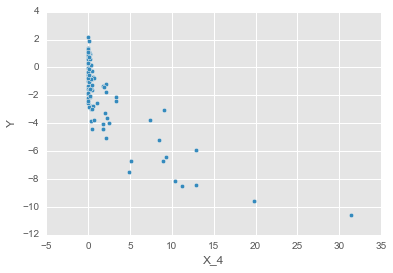

In [355]:
df_sim.plot(kind = 'scatter' , x = 'X_4' , y = 'Y')

In [357]:
df_sim.columns

Index([u'X', u'X_sq', u'Y', u'X_3', u'X_4'], dtype='object')

In [359]:
var_X = df_sim[['X' , 'X_sq' , 'X_3' , 'X_4'] ]
var_Y = df_sim.Y

In [382]:
var_Y[3]
#test_X.columns

#df_sim.ix[2 , 'y_hat_linear']

-6.7331563050142265

In [363]:
df_sim['y_hat_linear'] = np.NAN
df_sim['y_hat_quad'] = np.NAN
df_sim['y_hat_cube'] = np.NAN
df_sim['y_hat_bisq'] = np.NAN

In [384]:
for i in range(0 , len(df_sim)):
    test_X = var_X.ix[[i]]
    test_y = var_Y[i]
    
    
    #leaving ith observation out -from the train set
    train_X = var_X.drop(var_X.index[i])
    train_y = var_Y.drop(var_Y.index[i])
    
    X_linear = train_X[['X']]
    X_quad = train_X[['X' , 'X_sq']]
    X_cube = train_X[['X' , 'X_sq' , 'X_3']]
    X_bisq = train_X[['X' , 'X_sq' , 'X_3' , 'X_4']]
    
    #selecting the columns for the test sets 
    
    test_X_linear = test_X[['X']]
    test_X_quad = test_X[['X' , 'X_sq']]
    test_X_cube = test_X[['X' , 'X_sq' , 'X_3']]
    test_X_bisq = test_X[['X' , 'X_sq' , 'X_3' , 'X_4']]

    

    # fitting the model
    model_linear = linear_model.LinearRegression().fit(X_linear , train_y)
    model_quad = linear_model.LinearRegression().fit(X_quad , train_y)
    model_cube =  linear_model.LinearRegression().fit(X_cube , train_y)
    model_bisq = linear_model.LinearRegression().fit(X_bisq , train_y)
    
    #predictions on the model
    #print len(model_quad.predict(test_X_quad))
    df_sim.ix[i , 'y_hat_linear'] = model_linear.predict(test_X_linear)
    df_sim.ix[i , 'y_hat_quad'] = model_quad.predict(test_X_quad)
    df_sim.ix[i , 'y_hat_cube'] = model_cube.predict(test_X_cube)
    df_sim.ix[i , 'y_hat_bisq'] = model_bisq.predict(test_X_bisq)
    
    

In [385]:
df_sim.head()

,X,X_sq,Y,X_3,X_4,y_hat_linear,y_hat_quad,y_hat_cube,y_hat_bisq
0,1.348813,1.819296,-2.388404,2.453890,3.309839,-0.065697,-2.385154,-2.198817,-2.282212
1,-1.729708,2.991889,-6.699097,-5.175095,8.951403,-3.564943,-7.777583,-7.428939,-7.437484
2,-1.222629,1.494821,-3.600165,-1.827611,2.234490,-3.104814,-4.231179,-4.457130,-4.545707
3,-1.507029,2.271135,-6.733156,-3.422665,5.158054,-3.323932,-6.001986,-5.976607,-6.026589
4,1.192503,1.422063,-3.241154,1.695813,2.022262,-0.238932,-1.691714,-1.415428,-1.452367


In [391]:
(df_sim.Y - df_sim.y_hat_quad).mean()

-0.0024033041498659857

In [392]:
#checking the mean errors:
msq_err_linear = ((df_sim.Y - df_sim.y_hat_linear) ).mean()
msq_err_quad = ((df_sim.Y - df_sim.y_hat_quad) ).mean()
msq_err_cube = ((df_sim.Y - df_sim.y_hat_cube) ).mean()
msq_err_bisq = ((df_sim.Y - df_sim.y_hat_bisq) ).mean()

print " The Mean square for the linear model is--- %r" % msq_err_linear
print " The Mean square for the quadratic model is--- %r" % msq_err_quad
print " The Mean square for the Cubic model is--- %r" % msq_err_cube
print " The Mean square for the 4th order model is--- %r" % msq_err_bisq






 The Mean square for the linear model is--- -0.03136798503241469
 The Mean square for the quadratic model is--- -0.0024033041498659857
 The Mean square for the Cubic model is--- 0.001249608376712773
 The Mean square for the 4th order model is--- -0.00940684362615448
